Aspects to Find:
- Mean area of the fires ✅
- Median area of the fire ✅
- Location of the fire (unit) ✅
- Number of days it takes to supress the fire an average
- Causes
- Number of fires per year ✅
- Average number of fires per year
- Median number of fires per year

Questions:
- Is there a correlation between rain and the number of fires per year?
- Is there a correlation between average temperature and number of fires per year?
- How can we prevent fires based on how most of them are started? Do we need laws?

In [78]:
#Setting up
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
os.system('clear')
fireData = pd.read_csv("californiaFireData.csv")

Location of the fires (unit)

In [79]:
#print(fireData)
# fireCounts = fireData.groupby('UNIT_ID').UNIT_ID.count()
# pd.DataFrame([],columns=["Unit","Count"])
# print(type(fireCounts))
# print(fireCounts)
print(fireData.groupby('UNIT_ID').UNIT_ID.count())

#Still need to graph this

UNIT_ID
         2
AEU    198
AFV    111
ANF    503
APF      1
      ... 
TUU    157
VLJ      1
VNC    403
WED      1
YNP    472
Name: UNIT_ID, Length: 90, dtype: int64


Mean area of the fires

In [80]:
print("The mean area of the fires in California is " + str(abs(fireData.SHAPE_Area.mean())))

The mean area of the fires in California is 12113522.155489773


Number of fires per year

        UNIT_ID
YEAR_          
1878.0        1
1895.0        1
1896.0        1
1898.0        5
1900.0       12
...         ...
2016.0      352
2017.0      607
2018.0      410
2019.0      308
2020.0      496

[123 rows x 1 columns]


KeyError: 'YEAR_'

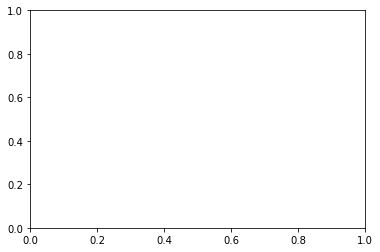

In [81]:
firesPerYear = pd.DataFrame(fireData.groupby('YEAR_').UNIT_ID.count())
firesPerYear.to_csv("fireTesting.csv")
print(firesPerYear)
#firesPerYear.plot.scatter(x="YEAR_",y="UNIT_ID")
firesPerYear.plot()
#firesPerYear.plot(kind = 'scatter', x = 'YEAR_', y = 'UNIT_ID')
#firesPerYear.plot.scatter(x = 'YEAR_', y = 'UNIT_ID')

plt.show()
#Still need to plot

Average Number of Fires Per Year

In [ ]:
print(abs(firesPerYear.UNIT_ID.mean()))

172.52032520325204


Median Area of the fires

In [ ]:
print("The median area of the fires in California is " + str(abs(fireData.SHAPE_Area.median())))

The median area of the fires in California is 1023914.7432780301
